# Постановка задачи

1. Использовать датасет Fashion-MNIST для обучения нейросети.
2. Сделать снимок какого-нибудь элемента одежды и предсказать его класс с помощью нейронной сети CNN.
3. Добавить аугментацию данных для увеличения датасета. Сравнить качество распознавания как на датасете, так и на собственных изображениях.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential # импортируем пустую последовательную модель Sequential, на которую последовательно навешиваем слои 
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer, RandomZoom # импортируем слои Dense (полносвязный), Flatten (чтобы расплющить результаты, сделать их одномерным массивом; чтобы слои Dense смогли принять данные с свёрточных слоёв); слой Dropout позволяет избежать переобучения
from keras.datasets import fashion_mnist # импортируем из модуля keras.datasets класс fashion_mnist (база данных изображений одежды)
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import requests
from PIL import Image
from io import BytesIO

%matplotlib inline

2023-01-28 11:42:20.759830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Импортируем данные

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # x_train, x_test: массив данных изображений в градациях серого uint8 с формой (размерность 28х28). y_train, y_test: массив меток uint8 (целые числа в диапазоне от 0 до 9)

In [5]:
type(x_train)

numpy.ndarray

In [6]:
# выводим размерности данных
print(f'x_train.shape: {x_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


## Проверка данных

In [7]:
SAMPLE_NUMBER = 6 # выбираем значение от 0 до 60 000 по колиечтсву значений в нашем датасете

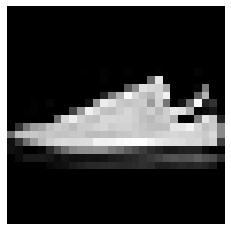

In [8]:
plt.imshow(x_train[SAMPLE_NUMBER], cmap='gray') # используем функцию imshow для отображения изображения
plt.axis('off')
plt.show()

In [9]:
print(f'Это изображение класса: {y_train[SAMPLE_NUMBER]}')

Это изображение класса: 7


In [10]:
fashion_mnist_classes = [ # задаём название для каждого значения класса
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'
]

Изображение:


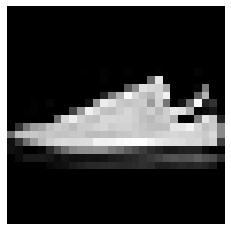

Это изображение класса: Sneaker


In [11]:
print(f'Изображение:')
plt.imshow(x_train[SAMPLE_NUMBER], cmap='gray')
plt.axis('off')
plt.show()
print(f'Это изображение класса: {fashion_mnist_classes[np.array(y_train[SAMPLE_NUMBER]).flatten()[0]]}')

## Предобработка данных

In [12]:
x_train[0] # отображаем массив данных, который хранится в значении "0"; из результатов видно, что значение каждого элемента (пикселя) находится в диапазоне от 0 до 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Нормализация данных

In [13]:
x_train_norm = x_train.astype('float32') / 255 # приводим данные к вещественным числам и делим на 255, потому что нейросети удобнее работать со значениями от 0 до 1, а не от 0 до 255
x_test_norm = x_test.astype('float32') / 255

In [14]:
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
y_train_norm = np_utils.to_categorical(y_train, 10) # проводим one-hot кодирование для labels (y) для 10 классов (10 классов картинок в датасете), чтобы нейросеть предсказывала данные в правильном формате (на выходе у сети будет 10 нейронов)
y_test_norm = np_utils.to_categorical(y_test, 10)

In [16]:
y_train_norm[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
x_train_norm.shape

(60000, 28, 28)

In [18]:
x_train_norm.shape[1]

28

## Создание модели

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(x_train_norm.shape[1], x_train_norm.shape[2], 1))) # добавляем свёрточный слой Conv2D; количество фильтров - 32; kernel_size - размер фильтра - 3х3; добавляем нелинейную активацию (функцию) Relu, чтобы всю нейросеть нельзя было свернуть в один нейрон; в самый первый слой сети передаём параметр input_shape=(28, 28) - размерность данных, которые будут подаваться в нейросеть - берётся из x_train_norm.shape без первого показтеля (количество экземпляров)
model.add(MaxPooling2D(pool_size=2)) # добавляем слой Pooling с параметром pool_size - размер фильтров слоя Pooling
model.add(Dropout(0.25)) # слой Dropout служит для того, чтобы модель не переобучалась; его смысл в том, что каждую итерацию обучения он случайным образом выключает какие-то из нейронов; 0.25 - доля тех нейронов, которая будет на время выключаться из процесса обучения; это связано с тем, что если моедль окажется зависима от какого-то одного нейрона (переобучится на нём), то когда этот нейрон попадёт в те 25%, что мы задали, нейросети придётся обучать модель на других нейронах

model.add(Flatten()) # преобразовываем данные в одномерный массив (одномерный вектор) для того, чтобы можно было работать со слоем Dense
model.add(Dense(32, activation='relu')) # полносвязный слой Dense не может работать с двумерным массивом данных (ему нужен одномерный массив), поэтому приходится предобрабатывать данные с помощью слоя Flatten
model.add(Dense(10, activation='sigmoid')) # последний выходной слой (тоже полносвязный), однако в нём количество нейронов будет равно количеству классов датафрейма (10); softmax - специальная активация, при которой выходные числа преобразовываются в формат процентов (%)

2023-01-28 11:42:58.363522: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # скомпилируем модель - зададим правила, по которым модель будет обучаться 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                200736    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [22]:
model.fit(x_train_norm, y_train_norm, epochs=10) # обучаем модель; функция ошибки (loss) должна уменьшаться, точность (accuracy) увеличиваться

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4392 - accuracy: 0.8429
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3048 - accuracy: 0.8906
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2697 - accuracy: 0.9018
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2481 - accuracy: 0.9096
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2290 - accuracy: 0.9152
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2160 - accuracy: 0.9208
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2029 - accuracy: 0.9249
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1940 - accuracy: 0.9281
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1848 - accuracy: 0.9314
Epoch 10/10
1875/1875 [==============================] - 31s 17m

In [23]:
model.evaluate(x_test_norm, y_test_norm) # проверяем точность на тестовых данных

313/313 [==============================] - 2s 5ms/step - loss: 0.2507 - accuracy: 0.9121


[0.2506779432296753, 0.9121000170707703]

## Проверка работы модели

In [36]:
def resize_image(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  width, height = img.size
  square_side = min(width, height)
  img = img.crop((
    np.ceil((width - square_side) / 2),
    np.ceil((height - square_side) / 2),
    np.ceil((width + square_side) / 2),
    np.ceil((height + square_side) / 2)
  )).convert('L')

  img.thumbnail((28, 28))
  np_array = -(np.array(img) - 256)
  np_array = np_array / 255

  np_array = np_array.reshape(28, 28, 1)

  return np_array

In [37]:
np.expand_dims(x_test_norm[8], axis=0).shape

(1, 28, 28)

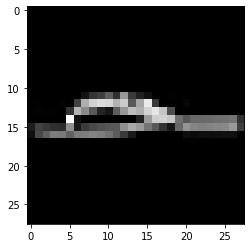

In [38]:
plt.imshow(x_test_norm[8], cmap='gray')

In [39]:
fashion_mnist_classes[np.argmax(model.predict(np.expand_dims(x_test_norm[8], axis=0)))]

1/1 [==============================] - 0s 25ms/step


'Sandal'

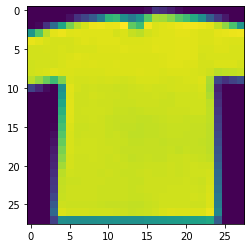

In [40]:
plt.imshow(resize_image('https://piterdm.ru/images/statyu/chernye_futbolki_dlya_sublimacii.jpg')) # загружаем фотографию
# https://piterdm.ru/images/statyu/chernye_futbolki_dlya_sublimacii.jpg
# https://i.imgur.com/BNzjEyH.jpg

In [42]:
fashion_mnist_classes[np.argmax(model.predict(np.expand_dims(resize_image('https://piterdm.ru/images/statyu/chernye_futbolki_dlya_sublimacii.jpg'), axis=0)))]
#fashion_mnist_classes(np.argmax(model.predict(np.array([resize_image('https://piterdm.ru/images/statyu/chernye_futbolki_dlya_sublimacii.jpg')]))))

1/1 [==============================] - 0s 28ms/step


'Bag'